In [18]:
!pip install --upgrade scikit-learn

Importing the Libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

Reading the Dataset

In [20]:
hdb_df = pd.read_csv("/content/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [21]:
hdb_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


Droping the unimportant columns

In [22]:
hdb_df = hdb_df.drop(['month', 'street_name', 'flat_model', 'lease_commence_date', 'block'], axis = 1)

In [23]:
hdb_df = hdb_df.rename(columns={'flat_type':'number_of_rooms','storey_range':'storey'})

Cleaning the data

In [24]:
hdb_df['number_of_rooms'] = hdb_df['number_of_rooms'].str.replace(r'EXECUTIVE','6 ROOM',regex=True)
hdb_df['number_of_rooms'] = hdb_df['number_of_rooms'].str.replace(r'MULTI-GENERATION','5 ROOM',regex=True)
hdb_df['number_of_rooms'] = hdb_df['number_of_rooms'].str.replace(r'ROOM','',regex=True).astype('int')

In [25]:
hdb_df['remaining_lease'] = hdb_df['remaining_lease'].str.split(' ')
hdb_df['remaining_lease'] = hdb_df['remaining_lease'].apply(lambda x: (float(x[0])+(float(x[2])/12)) if (len(x)==4) else float(x[0]))

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
hdb_df['storey'] = le.fit_transform(hdb_df['storey'])

Checking for null values

In [27]:
hdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107607 entries, 0 to 107606
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   town             107607 non-null  object 
 1   number_of_rooms  107607 non-null  int64  
 2   storey           107607 non-null  int64  
 3   floor_area_sqm   107607 non-null  float64
 4   remaining_lease  107607 non-null  float64
 5   resale_price     107607 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 4.9+ MB


In [28]:
hdb_df.isna().sum()

town               0
number_of_rooms    0
storey             0
floor_area_sqm     0
remaining_lease    0
resale_price       0
dtype: int64

Visual Analysis

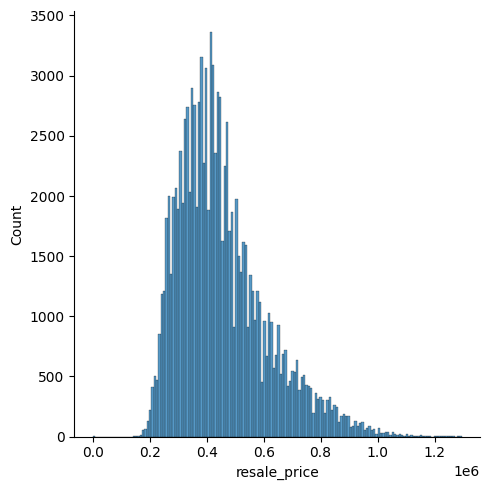

In [29]:
sns.displot(hdb_df['resale_price'])

In [30]:
hdb_df.describe()

,number_of_rooms,storey,floor_area_sqm,remaining_lease,resale_price
count,107607.000000,107607.000000,107607.000000,107607.000000,1.076070e+05
mean,4.147342,2.232596,97.810892,74.863389,4.540028e+05
std,0.921863,1.957491,24.159694,13.253282,1.575732e+05
min,1.000000,0.000000,31.000000,44.333333,3.000000e+00
25%,3.000000,1.000000,82.000000,64.416667,3.400000e+05
50%,4.000000,2.000000,95.000000,75.000000,4.220000e+05
75%,5.000000,3.000000,113.000000,84.916667,5.350000e+05
max,6.000000,16.000000,249.000000,97.750000,1.295000e+06


<Axes: >

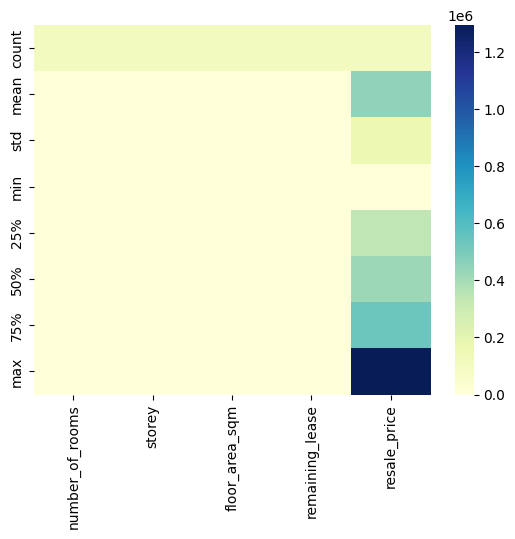

In [31]:
sns.heatmap(hdb_df.describe(), cmap = "YlGnBu")

In [32]:
hdb_df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [33]:
hdb_df = hdb_df.replace(dict.fromkeys(['SEMBAWANG','SENGKANG','WOODLANDS','YISHUN'], 'NORTH'))
hdb_df = hdb_df.replace(dict.fromkeys(['BUKIT MERAH','BUKIT TIMAH','QUEENSTOWN'], 'SOUTH'))
hdb_df = hdb_df.replace(dict.fromkeys(['BEDOK','GEYLANG','HOUGANG','KALLANG/WHAMPOA','PASIR RIS','PUNGGOL','SERANGOON','TAMPINES'], 'EAST'))
hdb_df = hdb_df.replace(dict.fromkeys(['BUKIT BATOK','BUKIT PANJANG','CHOA CHU KANG','CLEMENTI','JURONG EAST','JURONG WEST'], 'WEST'))
hdb_df = hdb_df.replace(dict.fromkeys(['ANG MO KIO','CENTRAL AREA','BISHAN','MARINE PARADE','TOA PAYOH'], 'CENTRAL'))

In [34]:
hdb_df['town'].unique()

array(['CENTRAL', 'EAST', 'WEST', 'SOUTH', 'NORTH'], dtype=object)

In [35]:
hdb_df = hdb_df.rename(columns={'town':'region'})

In [53]:
hdb_df

,region,number_of_rooms,storey,floor_area_sqm,remaining_lease,resale_price
0,CENTRAL,2,3,44.0,61.333333,232000.0
1,CENTRAL,3,0,67.0,60.583333,250000.0
2,CENTRAL,3,0,67.0,62.416667,262000.0
3,CENTRAL,3,1,68.0,62.083333,265000.0
4,CENTRAL,3,0,67.0,62.416667,265000.0
...,...,...,...,...,...,...
107602,WEST,3,1,74.0,62.250000,325888.0
107603,WEST,3,1,84.0,60.583333,328000.0
107604,WEST,3,0,84.0,60.666667,330000.0
107605,WEST,3,0,68.0,60.583333,339000.0


In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
hdb_df['region'] = le.fit_transform(hdb_df['region'])

In [69]:
hdb_df

,region,number_of_rooms,storey,floor_area_sqm,remaining_lease,resale_price
0,0,2,3,44.0,61.333333,232000.0
1,0,3,0,67.0,60.583333,250000.0
2,0,3,0,67.0,62.416667,262000.0
3,0,3,1,68.0,62.083333,265000.0
4,0,3,0,67.0,62.416667,265000.0
...,...,...,...,...,...,...
107602,4,3,1,74.0,62.250000,325888.0
107603,4,3,1,84.0,60.583333,328000.0
107604,4,3,0,84.0,60.666667,330000.0
107605,4,3,0,68.0,60.583333,339000.0


In [56]:
X = hdb_df.iloc[:,:-1].values
y = hdb_df.iloc[:,-1].values

Encoding the column

Splitting into train and test

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [58]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

Training the model

In [59]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
mlr_ypred = mlr.predict(X_test)
mlr_acc = r2_score(y_test,mlr_ypred)
mlr_acc

0.5814861698032463

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Let's determine the best degree for polynomial
for n in range(2,5):
    poly_reg = PolynomialFeatures(degree = n)
    X_poly = poly_reg.fit_transform(X_train)
    pr = LinearRegression()
    pr.fit(X_poly, y_train)
    poly_ypred = pr.predict(poly_reg.transform(X_test))
    poly_acc = r2_score(y_test,poly_ypred)
    poly_rmse = np.sqrt(mean_squared_error(y_test,poly_ypred))
    print(r'The accuracy of polynomial regression with degree of {} is {}'.format(n,poly_acc))
    print(r'The RMSE of polynomial regression with degree of {} is {}'.format(n,poly_rmse))

The accuracy of polynomial regression with degree of 2 is 0.6521500679920025
The RMSE of polynomial regression with degree of 2 is 91609.46681741982
The accuracy of polynomial regression with degree of 3 is 0.7044146462140206
The RMSE of polynomial regression with degree of 3 is 84447.31574765124
The accuracy of polynomial regression with degree of 4 is 0.805373620868301
The RMSE of polynomial regression with degree of 4 is 68524.4006381811


In [61]:
from sklearn.linear_model import Ridge
ridge_r = Ridge()
ridge_r.fit(X_train, y_train)
ridge_ypred = ridge_r.predict(X_test)
ridge_acc = r2_score(y_test,ridge_ypred)
ridge_acc

0.5814861297783949

In [62]:
from sklearn.linear_model import Lasso
lasso_r = Lasso(max_iter=100000)
lasso_r.fit(X_train, y_train)
lasso_ypred = lasso_r.predict(X_test)
lasso_acc = r2_score(y_test,lasso_ypred)
lasso_acc

0.5814864515824654

In [63]:
from sklearn.linear_model import ElasticNet
EN_r = ElasticNet()
EN_r.fit(X_train, y_train)
EN_ypred = EN_r.predict(X_test)
EN_acc = r2_score(y_test,EN_ypred)
EN_acc

0.5771287414299101

In [64]:
from sklearn.tree import DecisionTreeRegressor
tree_r = DecisionTreeRegressor()
tree_r.fit(X_train, y_train)
tree_ypred = tree_r.predict(X_test)
tree_acc = r2_score(y_test,tree_ypred)
tree_acc

0.7839901297082853

In [65]:
from sklearn.ensemble import RandomForestRegressor
forest_r = RandomForestRegressor(n_estimators = 10)
forest_r.fit(X_train, y_train)
forest_ypred = forest_r.predict(X_test)
forest_acc = r2_score(y_test,forest_ypred)
forest_acc

0.8410333149704109

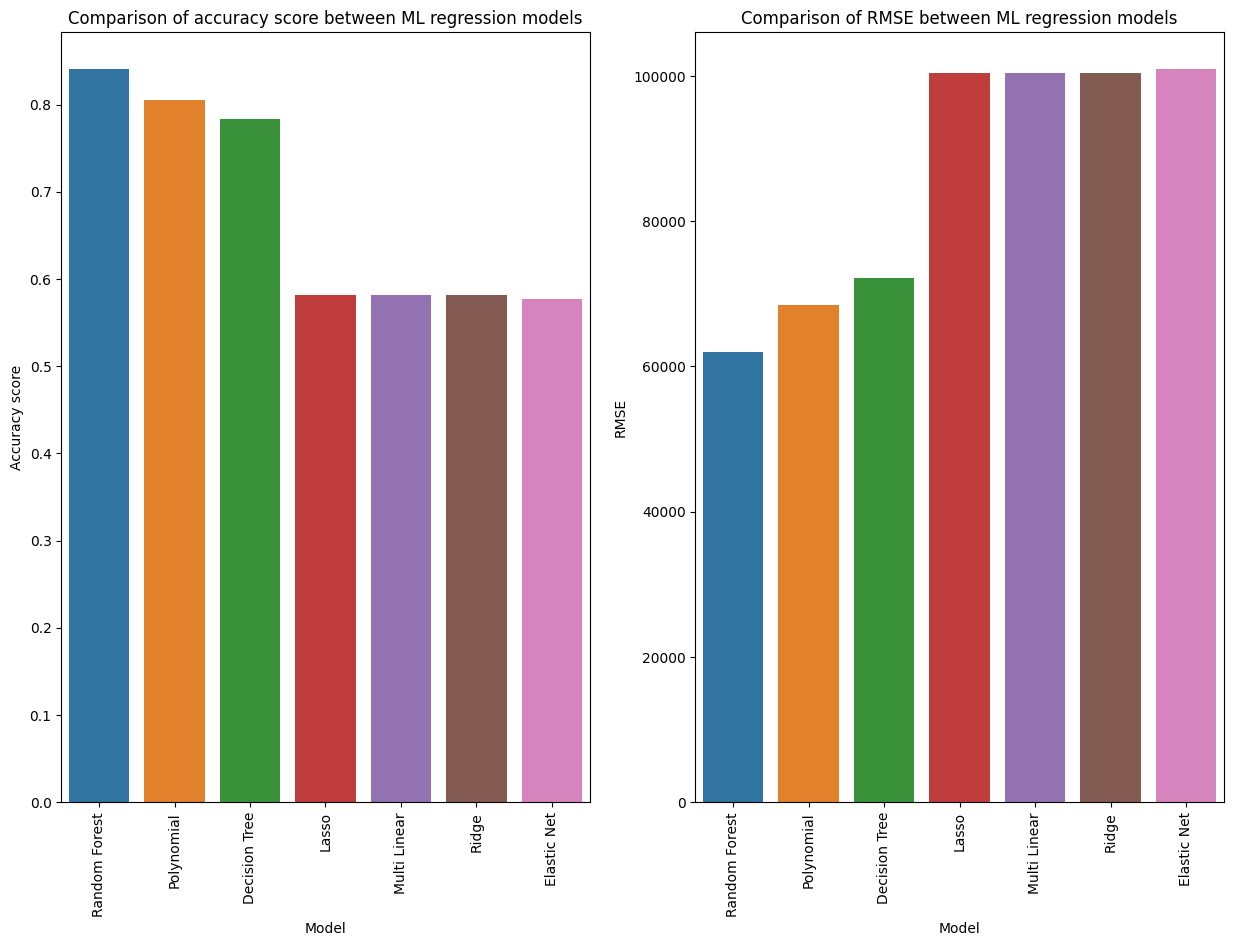

In [66]:

mlr_acc = r2_score(y_test,mlr_ypred)
mlr_rmse = np.sqrt(mean_squared_error(y_test,mlr_ypred))

ridge_acc = r2_score(y_test,ridge_ypred)
ridge_rmse = np.sqrt(mean_squared_error(y_test,ridge_ypred))

lasso_acc = r2_score(y_test,lasso_ypred)
lasso_rmse = np.sqrt(mean_squared_error(y_test,lasso_ypred))

EN_acc = r2_score(y_test,EN_ypred)
EN_rmse = np.sqrt(mean_squared_error(y_test,EN_ypred))

tree_acc = r2_score(y_test,tree_ypred)
tree_rmse = np.sqrt(mean_squared_error(y_test,tree_ypred))

forest_acc = r2_score(y_test,forest_ypred)
forest_rmse = np.sqrt(mean_squared_error(y_test,forest_ypred))

model_acc_score = [mlr_acc,poly_acc, ridge_acc, lasso_acc, EN_acc, tree_acc, forest_acc]
model_rmse = [mlr_rmse, poly_rmse, ridge_rmse, lasso_rmse, EN_rmse, tree_rmse, forest_rmse]
model_list = ['Multi Linear', 'Polynomial', 'Ridge', 'Lasso', 'Elastic Net', 'Decision Tree', 'Random Forest']
model_result_df = pd.DataFrame(
    {'Model': model_list,
     'Accuracy score': model_acc_score,
     'RMSE': model_rmse
    })
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
sns.barplot(data=model_result_df, x='Model', y='Accuracy score', ax=ax1,order=model_result_df.sort_values('Accuracy score',ascending = False).Model).set_title("Comparison of accuracy score between ML regression models")
ax1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
sns.barplot(data=model_result_df, x='Model', y='RMSE', ax=ax2, order=model_result_df.sort_values('RMSE').Model).set_title("Comparison of RMSE between ML regression models")
ax2 = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

Saving the best model

In [68]:
pickle.dump(forest_r, open('singapore.pkl', 'wb'))